In [1]:
using SpinTrack
using Plots

In [2]:
p = symmetric_hybrid_ring()

RingParameters{Float64, Union{Drift, ElectricBendingSection, MagneticQuadrupole}}
  particle: Particle
  ring: RingStructure{Union{Drift, ElectricBendingSection, MagneticQuadrupole}}
  region_change_function!: change_region! (function of type typeof(change_region!))
  element_index: Int64 1
  verbose: Bool false
  alg: OrdinaryDiffEq.Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}
  save_positions: Bool false
  starting_time: Float64 0.0
  turns: Float64 500.0
  saving_time_step: Float64 79.96613649825782
  internal_max_time_step: Float64 1.0
  state_tolerance_rel: Float64 1.0e-12
  state_tolerance_abs: Float64 1.0e-14
  if_EDM_on: Bool false
  η: Float64 1.9e-15
  RF_on: Bool false
  RF_phase: Float64 0.0
  cyclotron_freq: Float64 224331.89075717534
  RF_omega: Float64 1.1276150719498402e8
  RF_voltage: Float64 1890.0
  is_losing_energy: Bool false
  beam_current: Float64 3.594193106710059e-14
  ring_impedance: Float64 1000.0
  ene

In [18]:
p.saving_time_step = 0.5 # get dense solution (saving every 0.5m)

0.5

In [9]:
sol = get_solution(u1_long(1e-6), p);

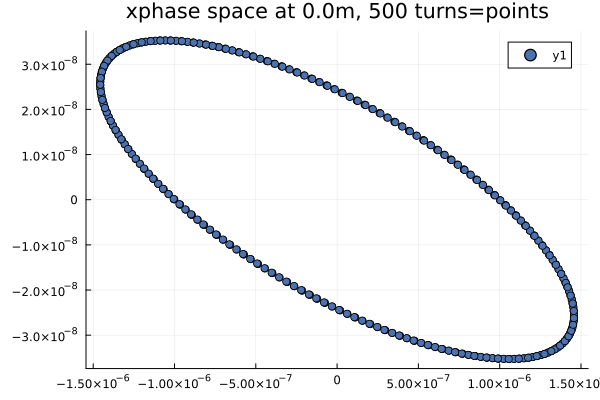

In [52]:
offset = 0
x = [sol(turn * p.ring.total_length + offset)[1] for turn in 1:p.turns-1]
xprime = [sol(turn * p.ring.total_length + offset)[2] for turn in 1:p.turns-1]


scatter(x, xprime, title="xphase space at 0.0m, 500 turns=points")

# Find the area programmatically and it will be the emittance which will scale the beta functions

In [53]:
# Exercise: find a reliable way of finding ellipse area 
incorrect_ellipse_area_x = 1.0
incorrect_ellipse_area_y = 1.0

1.0

In [43]:
bins = 1600
detector_bins =  range(0, length = bins, stop = p.ring.total_length);
function get_beta_functions(sol)


    x_positions_per_bin = [];
    max_x_position_per_bin = [];
    x_angles_per_bin = [];


    y_positions_per_bin = [];
    max_y_position_per_bin = [];
    y_angles_per_bin = [];

    for bin_index in 1:bins
        xpos = []
        xangle = []
        ypos = []
        yangle = []

        for turn in 1:p.turns
            state = sol(detector_bins[bin_index] + p.ring.total_length * (turn - 1))
            push!(xpos, state[1])
            push!(xangle, state[2])
            push!(ypos, state[3])
            push!(yangle, state[4])

        end


        push!(x_positions_per_bin, xpos)
        push!(x_angles_per_bin, xangle)
        push!(y_positions_per_bin, ypos)
        push!(y_angles_per_bin, yangle)

        push!(max_x_position_per_bin, maximum(xpos))
        push!(max_y_position_per_bin, maximum(ypos))
    end

    beta_x = max_x_position_per_bin .^ 2
    beta_y = max_y_position_per_bin .^ 2

    return beta_x, beta_y
end

get_beta_functions (generic function with 1 method)

In [41]:
betax, betay = get_beta_functions(sol)

([2.122402921298405e-12, 2.085433901020007e-12, 2.048658572874867e-12, 2.0120502794891975e-12, 1.9766021256124532e-12, 1.9413063481741513e-12, 1.9062763816612412e-12, 1.8717642712061835e-12, 1.838057595865246e-12, 1.8045268942184187e-12  …  2.0969416075875325e-12, 2.134326603514871e-12, 2.1723785738454187e-12, 2.2108131907216716e-12, 2.249485883640166e-12, 2.266858968637594e-12, 2.2374469630229605e-12, 2.198521963043505e-12, 2.159968940096287e-12, 2.122402921298405e-12], [1.6794930267815088e-12, 1.7100322078790906e-12, 1.741223726500693e-12, 1.7730346045197746e-12, 1.8056614081762718e-12, 1.8388942425525945e-12, 1.8727823660980795e-12, 1.9073291295123054e-12, 1.9425432946636097e-12, 1.9785084003121626e-12  …  1.7002008951997403e-12, 1.6699114385078058e-12, 1.6402525049680484e-12, 1.611270538473875e-12, 1.583331308981434e-12, 1.5728175352209742e-12, 1.591883870303568e-12, 1.6204024532744767e-12, 1.6495971373406174e-12, 1.6794930267815088e-12])

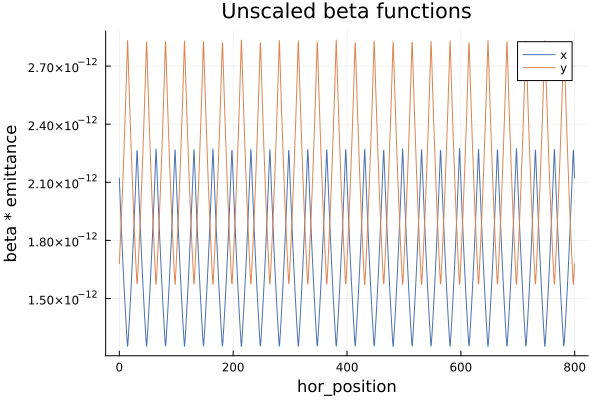

In [54]:
plot(detector_bins, betax ./ incorrect_ellipse_area_x, lab="x", xlab = "hor_position", ylab="beta * emittance", title="Unscaled beta functions")


plot!(detector_bins, betay ./ incorrect_ellipse_area_y, lab="y")